# Exámen Interciclo P2
Realizado por: Tatiana Cárdenas

In [29]:
from IPython.display import Image

# Analisis del problema:

Tras la pandemia mundial denominada COVID-19, se incrementó 611 recintos electorales para el 2021, de tal manera que, según la información proporcionada por el (Consejo Nacional Electoral, 2021), dentro de las estadísticas del registro electoral de las elecciones realizadas en el 2021, se presenta un documento de manera transparente en el cual se evidencia la información detallada de los votantes de acuerdo a su parroquia a la que fue asignada, no obstante, este documento se encuentra en formato .sav, para lo cual se tuvo que instalar el programa GNU PSPP en Linux para poder visualizar dicha data.

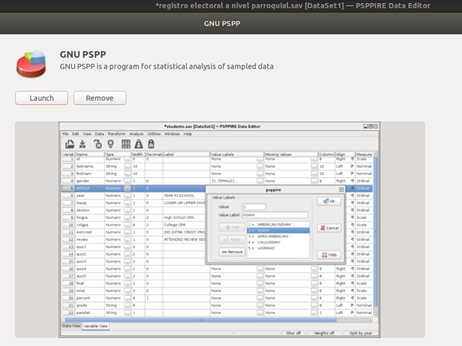

In [30]:
Image("Picture1.png", width=600, height=600)

De manera inicial, el documento no proporciona directamente el nombre de la parroquia a la cual hacer referencia la data, sino al código de esta, para lo cual, se tuvo que buscar a que parroquia hace referencia el lugar donde voy a sufragar normalmente y la relación con el código que se presenta, es decir la parroquia Huayna Capac como se presenta a continuación:

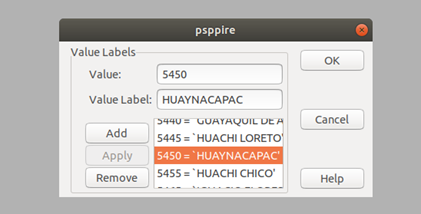

In [31]:
Image("Picture2.png", width=600, height=600)

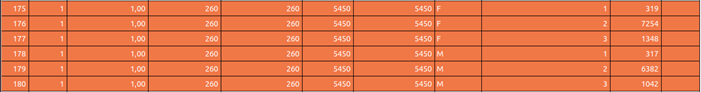

In [32]:
Image("Picture3.png", width=999, height=999)

Realizando un análisis de la data, podemos diferir que existen 3 juntas de voto, y la junta receptora de la Universidad de Cuenca aproximadamente tuvo 5.554 electores. Normalmente en los recintos que son bastante pequeños según los estudiantes de medicina de la Universidad del Azuay y la Universidad Católica, existen entre 12 - 15 mesas de tal manera que, el recinto de la Universidad de Cuenca es bastante grande, por lo que se establece 23 mesas de vacunación.

-------------------------------------------------------------------------------------------------------------------------------

In [33]:
#Importación de librerías
import matplotlib.pyplot as plt
import simpy
import random
import datetime 
from statistics import mean


#Nueva libreria para graficas
import seaborn as sns
import pygal

print('Importadas')

Importadas


Variables: A continuación se definen las variables con sus respectivos valores

In [34]:
# Personas que asistieron a votar
TOTAL_PERSONAS = 5554 # REFERENCIA 1

# Unicamente el 80% de electores serán vacunados
PERSONAS_A_VACUNAR = TOTAL_PERSONAS*0.8

# Personal de vacunación "MESAS"
# Normalmente en los recintos que son bastante pequeños segun los estudiantes de la uda existen entre 12 - 15 mesas de 
#vacunacion por lo que se establece que el el recinto de la Universidad de Cuenca es bastante grande, por lo que se 
#establece 23 mesas de vacunacion
PERSONAL_VACUNACION = 23

# Intervalo de tiempo de control para que la persona se registre "minutos"
REGISTRO_DATOS_MESA = 5

# Intervalo de tiempo para vacunación "minutos"
#◦	Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.
VACUNACION_PERSONA = 6

# Intervalo de tiempo para verificación de salud despues de vacunarse "minutos"
# Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud
VERIFICACION_SALUD = 20

#◦	La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.
CERTIFICADO_SEGUNDA = 2

# Tiempo de simulación 2H
TIEMPO_SIMULACION = 120

# Vacunados
VACUNADOS = 0

# Cantidad de personas que llegaron
TOTAL_PERSONAS = 0

# Tiempo Vacunación
TIEMPO_TOTAL_VACUNACION = 0

# Tiempo Espera
TIEMPO_ESPERA = 0

# Tiempo de vacunación de cada persona
TIEMPO_VACUNACION_PER_PERS = {}

# Tiempo de espera de cada persona
TIEMPO_ESPERA_PER_PERSONA = {}

# ID de la persona
PERSONA_UID = {}


lista_no_vacuna = {}

randomlistNO = []
randomlistSI = []


# Vacunación:

In [35]:
class Vacunacion(object):

    def __init__(self, environment, personalVacunacion, tiempoEsperarTurno, tiempoVacunacion, tiempoVerificarSalud):
        # Guardamos como variable el entorno de ejecucion
        self.env = environment
        # Creamos el recurso que representa las mesas para la vacunacion de las electores
        self.mesa_vacunacion = simpy.Resource(environment, personalVacunacion)
        # Variable para el tiempo que tenga que esperar el elector por ir a la mesa
        self.tiempoEsperarTurno = tiempoEsperarTurno
        # Variable para el tiempo que dure el proceso de vacunacion por paciente
        self.tiempoVacunacion = tiempoVacunacion
        # Variable para el tiempo que el paciente debe estar en sala de espera para verificar la salud post vacuna
        self.tiempoVerificarSalud = tiempoVerificarSalud
       
    #Paso 1: Hacer fila en caso de que las mesas esten ocupadas
    def esperar_turno_mesa(self):
        yield self.env.timeout(self.tiempoEsperarTurno)
    
    #Paso 2: Vacunar a la persona
    def vacunar_elector(self, elector):
        yield self.env.timeout(random.randint(self.tiempoVacunacion-2, self.tiempoVacunacion+2))
    
    #Paso 3: Verificar la salud del elector despues de haber vacunado al elector    
    def verificacion_salud(self):
        yield self.env.timeout(self.tiempoVerificarSalud)
    
    #Paso 4: Dar certificado de vacuna al elector    
    def recibir_certificado(self):
        yield self.env.timeout(random.randint(2,3))
        
def electores_vacunados():
    global VACUNADOS
    VACUNADOS +=1

def electores():
    global TOTAL_PERSONAS
    TOTAL_PERSONAS +=1
    
def espera(elector, espera):
    global TIEMPO_ESPERA,TIEMPO_ESPERA_PER_PERSONA
    TIEMPO_ESPERA_PER_PERSONA[elector.split('-')[0]] = espera
    TIEMPO_ESPERA += espera
    
def vacunar(elector, tiempoPersona):
    global TIEMPO_TOTAL_VACUNACION, TIEMPO_VACUNACION_PER_PERS
    TIEMPO_VACUNACION_PER_PERS[elector.split('-')[0]] = tiempoPersona
    TIEMPO_TOTAL_VACUNACION += tiempoPersona

def entrada_recinto(env, elector_uid, vacunacion):

    
    #PROCESO 1: PASO 1
    #Paso 1: Hacer fila en caso de que las mesas esten ocupadas
    
    yield env.process(vacunacion.esperar_turno_mesa())
    start_espera = env.now

    #FIN PROCESO 1: PASO 1
    
        
    # Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.
    
    vacuna_verdadera1 = int(float(PERSONAS_A_VACUNAR*0.5))
    vacuna_verdadera2 = int(float(vacuna_verdadera1*0.10))

    print(vacuna_verdadera1)
    print(vacuna_verdadera2)

    vac = random.randrange(1, 100)
    if vac <= 10:
        #     rnd = random.randint(1,100)
        #     if rnd <= 10:
        print('La persona [%s] no puede ser vacunada'%(elector_uid))
        print('********* NO CUMPLE CONTROL ***********')

        print('La persona con el uid: %s, no puede ser vacunada' % (elector_uid))
    else:
        # Especificamos que vamos a usar un recurso (Resource) que representa una mesa
        with vacunacion.mesa_vacunacion.request() as m:
            
        #Inicio Proceso de vacunacion
            print('********* INGRESO A MESA *********')
            print('La persona con el uid: %s, pasa a la ingresa a vacunación ** Hora de entrada %.2f.' % (elector_uid, env.now))
            yield m
            start_vacuna = env.now
    
            # Procesamos la operacion de vacunacion
            yield env.process(vacunacion.vacunar_elector(elector_uid))
            electores_vacunados() #Fin de vacunacion y registro de persona vacunada

            end_vacunacion = env.now-start_vacuna
            
            vacunar(elector_uid,end_vacunacion)            
            print('********* FIN VACUNACION *********')
            print('La persona con el uid: %s, fue vacunada a las %.2f' % (elector_uid, env.now)) 
        
        #Fin Proceso de vacunacion
            print('********** INGRESO A CHEQUEO POST VACUNA **********')
            print('La persona con el uid: %s, entra a chequeo de salud a las %.2f.' % (elector_uid, env.now))
            yield env.process(vacunacion.verificacion_salud())
        #Inicio proceso de verificacion de salud
        
        #Fin proceso de verificacion de salud
        
        #Inicio entrega de certificado
            
            #Operacion para conocer la proxima fecha para la segunda dosis despues de 30 dias
            ahora = datetime.datetime.utcnow()
            proxima_vacuna = ahora + datetime.timedelta(days=30)
            time = proxima_vacuna.strftime("%Y:%m:%d")

            espera(elector_uid, env.now-start_espera)

            print('************ CERTIFICADO Y SALIDA ******************')
            print('La persona con el uid: %s pasa a recibir su certificado ** SEGUNDA DOSIS: %s' % (elector_uid, time))
            print('La persona con el uid: %s sale del recinto de vacunacion a las %.2f.' % (elector_uid, env.now))
        
        
def ejecutar_simulacion(env, personalVacunacion, tiempoEsperarTurno, tiempoVacunacion, tiempoVerificarSalud):
    vacunacion=Vacunacion(env, personalVacunacion, tiempoEsperarTurno, tiempoVacunacion, tiempoVerificarSalud)
    
    for i in range(50):
        electores()
        env.process(entrada_recinto(env, '%d'%(i+1), vacunacion))
        
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(1)
        i+=1
        electores()
        env.process(entrada_recinto(env,'%d'%(i+1), vacunacion))  
    

print('Vacunacion COVID-19 ECUADOR')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, PERSONAL_VACUNACION, REGISTRO_DATOS_MESA, VACUNACION_PERSONA, VERIFICACION_SALUD))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Vacunacion COVID-19 ECUADOR
2221
222
********* INGRESO A MESA *********
La persona con el uid: 1, pasa a la ingresa a vacunación ** Hora de entrada 5.00.
2221
222
La persona [2] no puede ser vacunada
********* NO CUMPLE CONTROL ***********
La persona con el uid: 2, no puede ser vacunada
2221
222
********* INGRESO A MESA *********
La persona con el uid: 3, pasa a la ingresa a vacunación ** Hora de entrada 5.00.
2221
222
********* INGRESO A MESA *********
La persona con el uid: 4, pasa a la ingresa a vacunación ** Hora de entrada 5.00.
2221
222
********* INGRESO A MESA *********
La persona con el uid: 5, pasa a la ingresa a vacunación ** Hora de entrada 5.00.
2221
222
********* INGRESO A MESA *********
La persona con el uid: 6, pasa a la ingresa a vacunación ** Hora de entrada 5.00.
2221
222
********* INGRESO A MESA *********
La persona con el uid: 7, pasa a la ingresa a vacunación ** Hora de entrada 5.00.
2221
222
********* INGRESO A MESA *********
La persona con el uid: 8, pasa a la in

# Resultados:

Total de personas vacunadas:

In [36]:
print('Total de electores vacunadas:',VACUNADOS)

Total de electores vacunadas: 113


Promedio de tiempo de espera:

In [37]:
new_l = list(map(int, TIEMPO_ESPERA_PER_PERSONA))  # or just map(int, l) in Python 2
promedio_espera = mean(new_l)
print('El promedio de espera desde hacer fila hasta que le entregan el certificado es:', round(promedio_espera,2))

El promedio de espera desde hacer fila hasta que le entregan el certificado es: 50.77


# Gráficas representativas de los resultados:

Se utiliza una nueva librería para gráficas denominada "SEABORN"

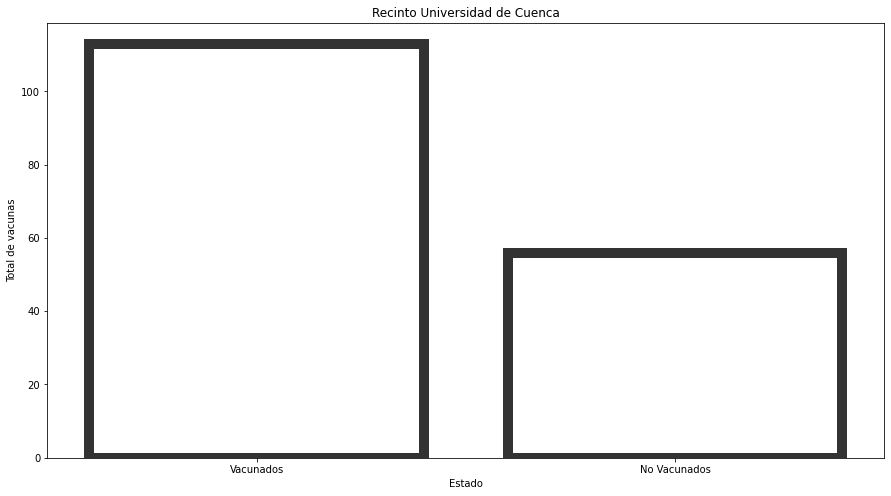

In [38]:
# A continuación se presenta la gráfica representativa de los vacunados vs los no vacunados
fig = plt.figure(figsize=(15,8))
plt.title('Recinto Universidad de Cuenca')
x = ['Vacunados', 'No Vacunados']
y = [VACUNADOS, TOTAL_PERSONAS-VACUNADOS]
#current_palette = sns.color_palette()
#Seaborn
sns.barplot(x=x, y=y,linewidth=10, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
plt.xlabel('Estado')
plt.ylabel('Total de vacunas')
plt.show()

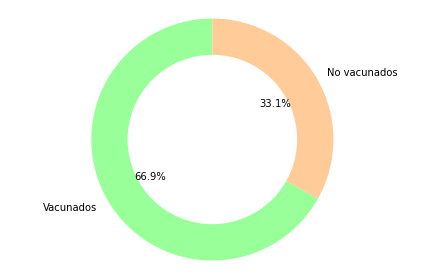

In [39]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#fig = plt.figure(figsize=(15,8))
fig.suptitle('Long Suptitle', fontsize=24)
labels =  ('Vacunados', 'No vacunados')
sizes = [VACUNADOS, TOTAL_PERSONAS-VACUNADOS]
explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()


ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, )
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


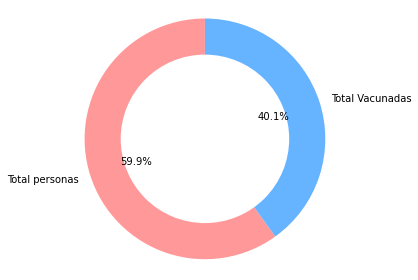

In [40]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#fig = plt.figure(figsize=(15,8))
labels =  'Total personas', 'Total Vacunadas'
sizes = [TOTAL_PERSONAS,VACUNADOS]
explode = (0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()


ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, )
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [41]:
bar_chart = pygal.Bar()                                            # Then create a bar graph object
bar_chart.add('Fibonacci', [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55])  # Add some values
bar_chart.render_to_file('bar_chart.svg')    


# Librerias extras utilizadas:

* Seaborn: se basa en la biblioteca matplotlib. tiene muchas funciones integradas con las que puede crear gráficos llamativos con solo líneas simples de códigos. Proporciona una variedad de gráficos de visualización avanzada con una sintaxis simple como gráficos de caja, gráficos de violín, gráficos de dist, gráficos conjuntos, gráficos de pares, mapas de calor, entre otros.
* IPython.display

# Referencias

[1] http://portal.cne.gob.ec/es/estadisticas/bases-de-datos/category/1954-registro-electoral